In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ANALISIS EXPLORATORIO A FASHION MNIST

In [3]:
test = pd.read_csv("mnist_train.csv")
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print("Dimensiones del dataset: ", test.shape)

print(test.info())

print(test.isnull().sum().sum())

Dimensiones del dataset:  (60000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
0


              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169    

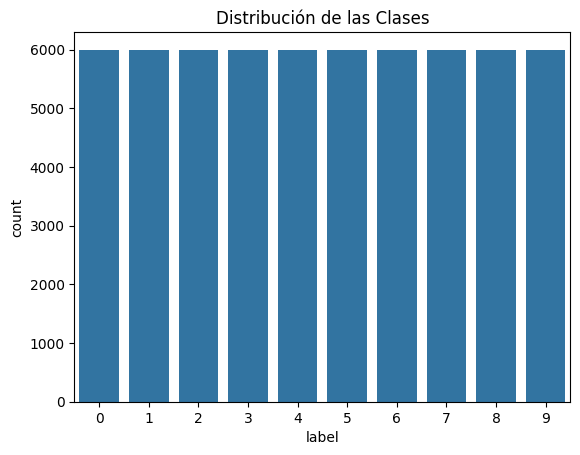

In [7]:
# Estadísticas descriptivas
print(test.describe())

sns.countplot(x=test.iloc[:, 0])
plt.title("Distribución de las Clases")
plt.show()

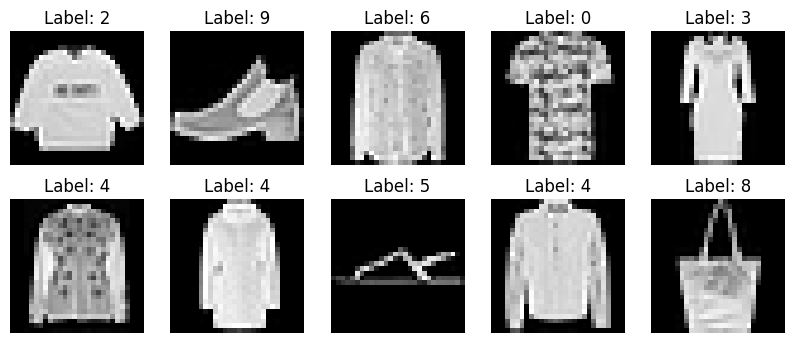

In [8]:
# Función para mostrar imágenes
def plot_images(data, labels, num_images=10):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        img = data.iloc[i, 1:].values.reshape(28, 28)  # Excluir la etiqueta
        plt.imshow(img, cmap="gray")
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()

# Llamar a la función
plot_images(test, test.iloc[:, 0])

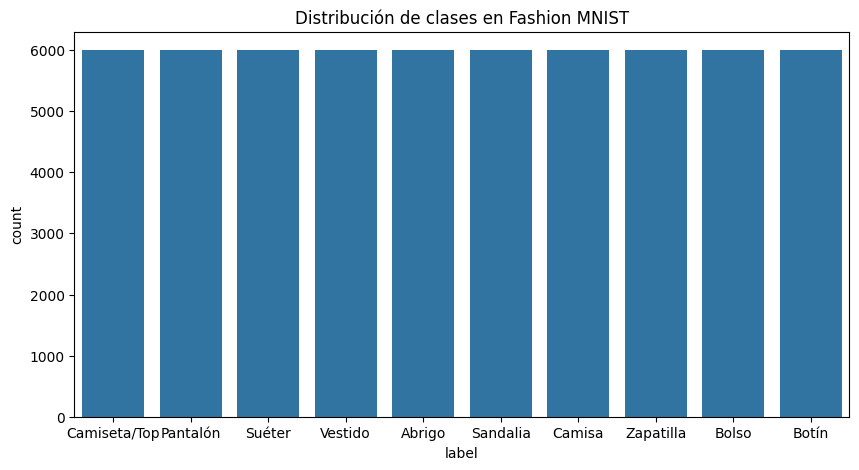

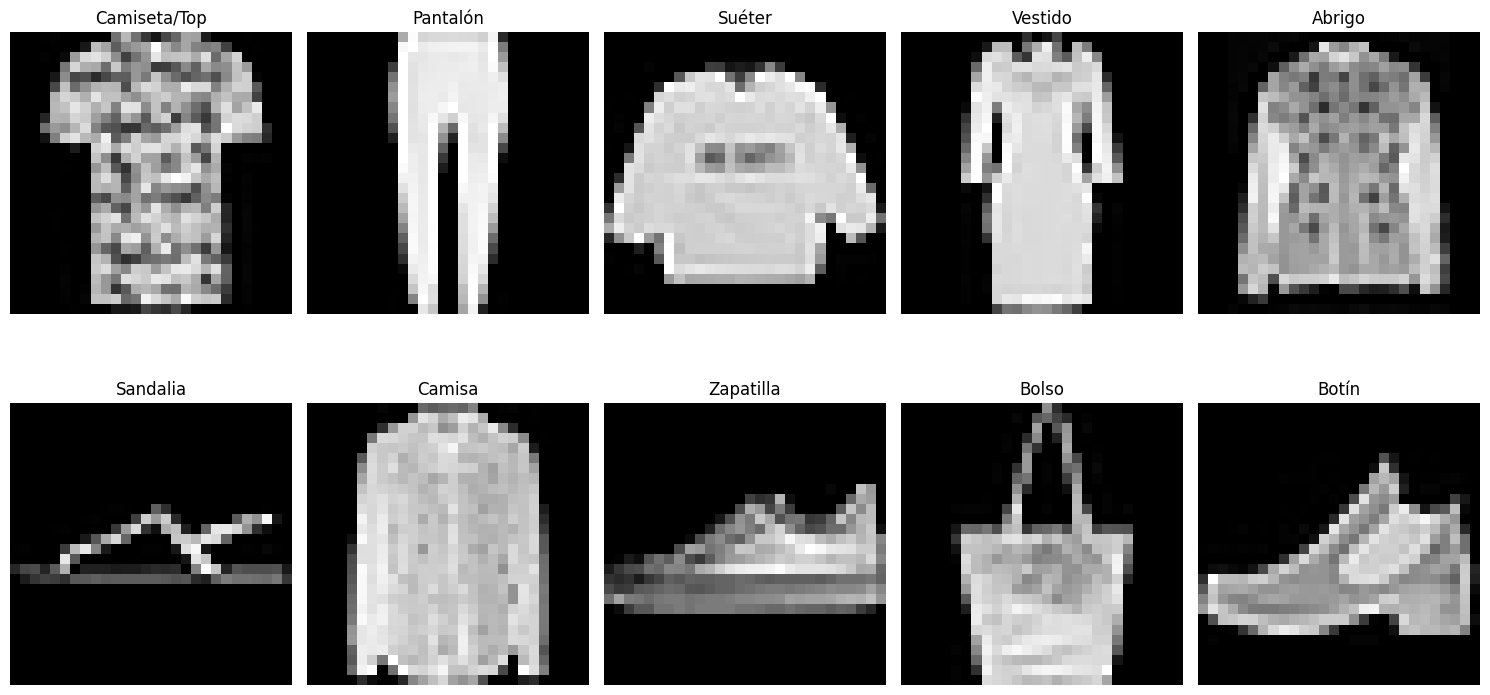

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=test)
plt.title('Distribución de clases en Fashion MNIST')
plt.xticks(ticks=range(10), 
           labels=['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
                  'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín'])
plt.show()

# Diccionario de etiquetas
label_names = {
    0: 'Camiseta/Top',
    1: 'Pantalón',
    2: 'Suéter',
    3: 'Vestido',
    4: 'Abrigo',
    5: 'Sandalia',
    6: 'Camisa',
    7: 'Zapatilla',
    8: 'Bolso',
    9: 'Botín'
}

# Visualizar múltiples imágenes
plt.figure(figsize=(15, 15))
for i in range(10):
    # Seleccionar la primera imagen de cada clase
    img = test[test['label'] == i].iloc[0, 1:].values.reshape(28, 28)
    
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

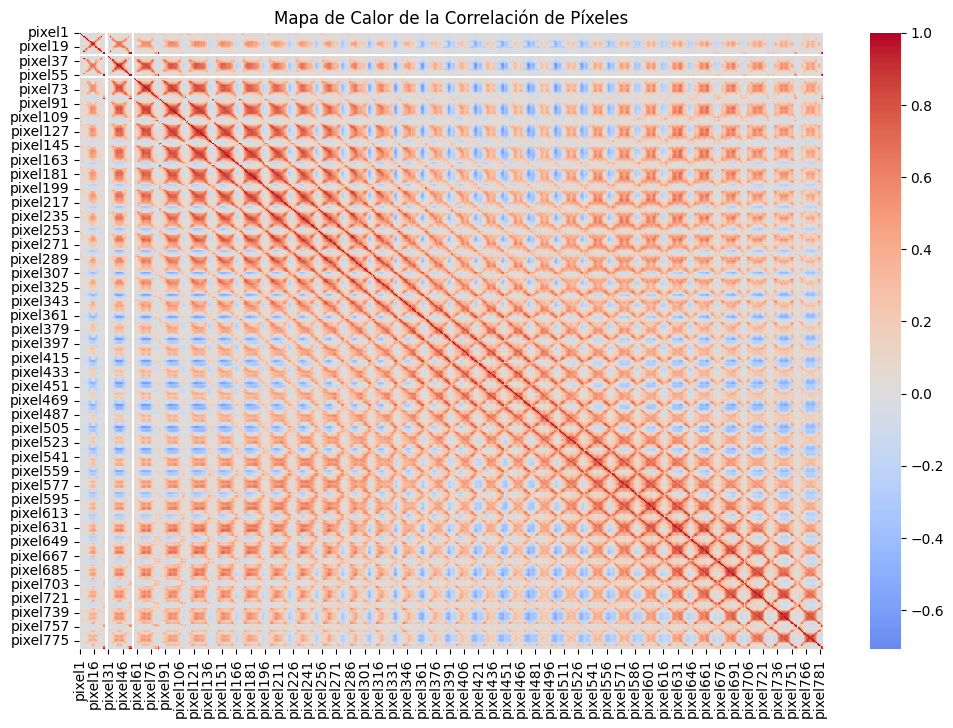

In [9]:
#corr matrix
sample_df = test.sample(500)
corr_matrix = sample_df.iloc[:, 1:].corr()

# calor plt 
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Mapa de Calor de la Correlación de Píxeles")
plt.show()

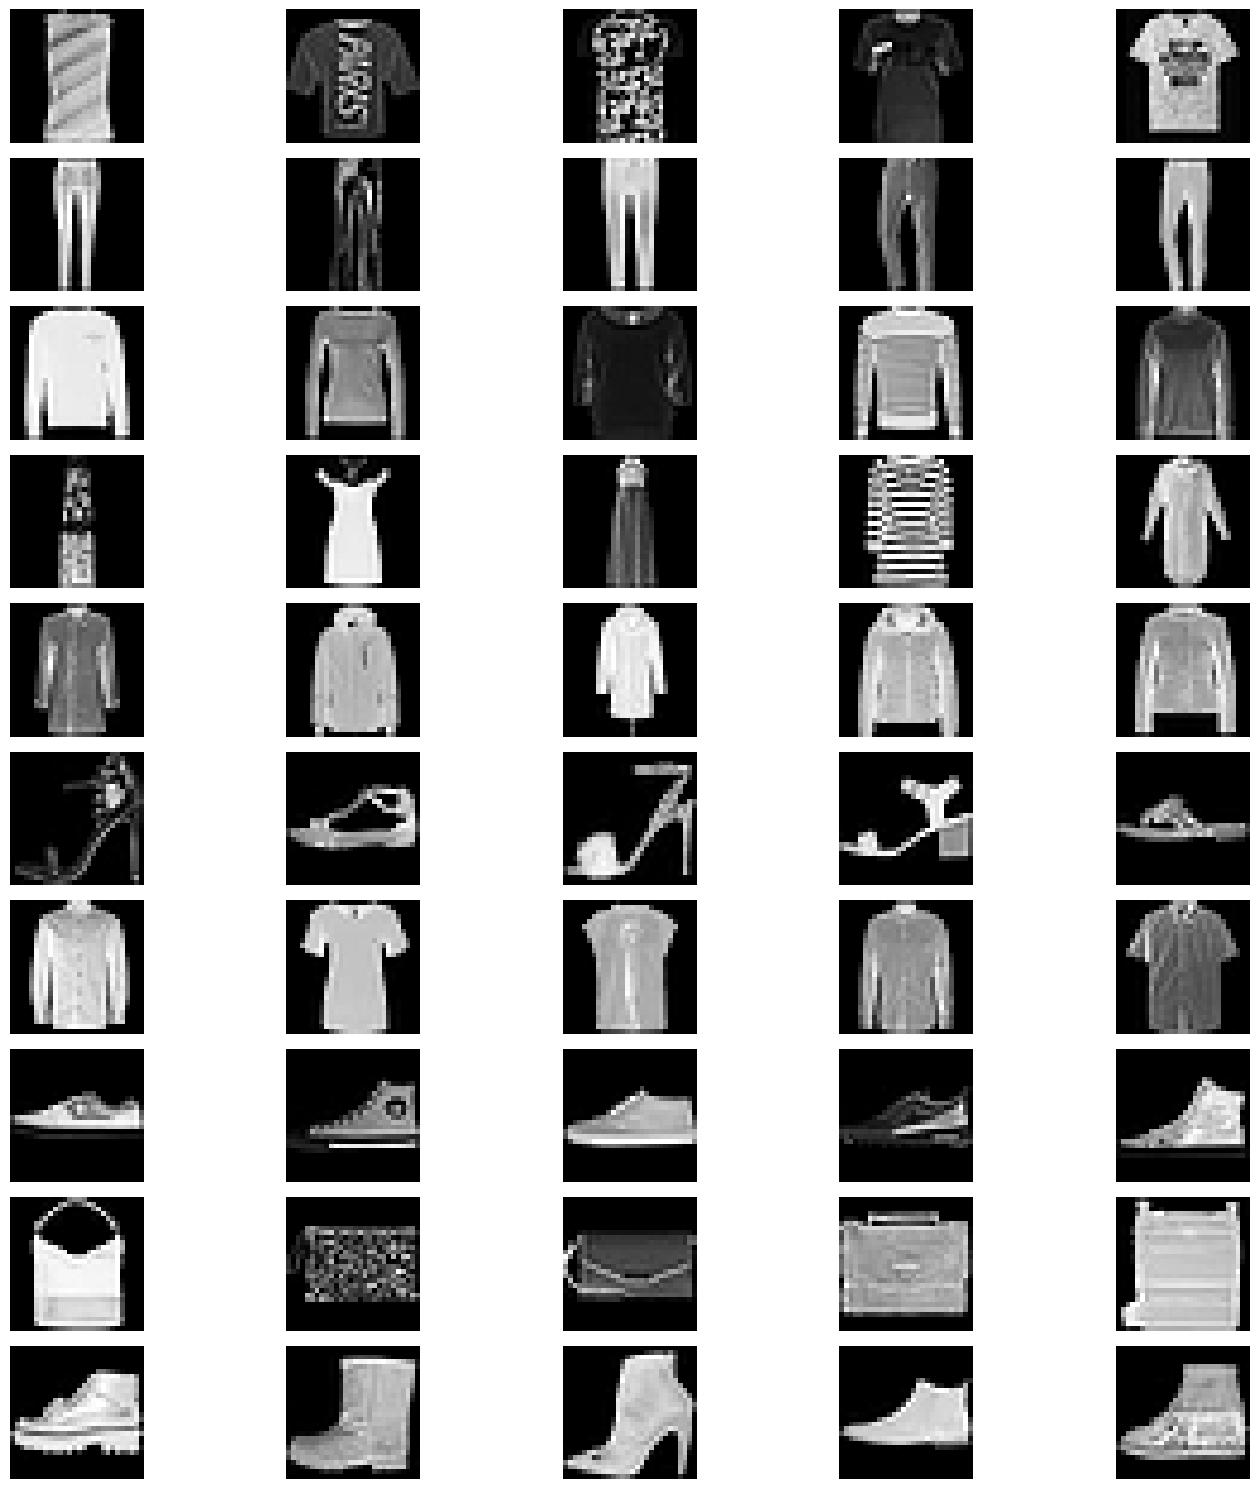

In [38]:
# Mostrar variabilidad dentro de cada clase
plt.figure(figsize=(15, 15))
for class_id in range(10):
    class_samples = test[test['label'] == class_id].sample(5, random_state=42)
    
    for j in range(5):
        img = class_samples.iloc[j, 1:].values.reshape(28, 28)
        
        plt.subplot(10, 5, class_id*5 + j + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.ylabel(label_names[class_id], rotation=0, ha='right')

plt.tight_layout()
plt.show()

PCA con 95% de varianza

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [11]:
# Separar etiquetas y características
labels = test.iloc[:, 0]  # Suponiendo que la primera columna es la etiqueta
features = test.iloc[:, 1:]  # Resto de columnas son píxeles

# Normalizar los datos (es recomendable antes de aplicar PCA)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Componentes principales seleccionados: 256


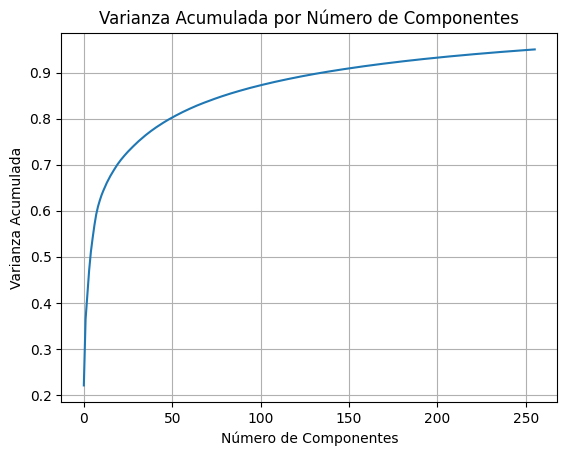

In [12]:
pca = PCA(n_components=0.95)  # Se elige el % de varianza a conservar
features_pca = pca.fit_transform(features_scaled)

# Mostrar cuántos componentes principales se conservaron
print(f"Componentes principales seleccionados: {pca.n_components_}")

# Ver la varianza acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada por Número de Componentes")
plt.grid()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler


In [24]:
def nb_models(csv_file):
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.decomposition import PCA
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
    from sklearn.metrics import f1_score, classification_report
    import numpy as np

    df = pd.read_csv(csv_file)

    # Labels and features
    labels = df.iloc[:, 0]
    features = df.iloc[:, 1:]

    # Normalization [0, 1]
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # PCA 95% var
    pca = PCA(n_components=0.95)
    features_pca = pca.fit_transform(features_scaled)

    print(f"Componentes principales seleccionados: {pca.n_components_}")

    # Reescalar a [0, 1] para MultinomialNB
    scaler_pos = MinMaxScaler(feature_range=(0, 1))
    features_pca_pos = scaler_pos.fit_transform(features_pca)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        features_pca_pos, labels, test_size=0.2, random_state=42
    )

    # Modelos Naive Bayes
    models = {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(binarize=0.5)  # Binariza internamente con umbral 0.5
    }

    results = {}

    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred, average="weighted")
            results[name] = f1
            print(f"\n{name} - F1 Score: {f1:.4f}")
            print(classification_report(y_test, y_pred))
        except Exception as e:
            print(f"\nError en {name}: {str(e)}")
            results[name] = None

    return results

results = nb_models("/Users/emece/patterns/laboratorio6/mnist_test.csv")

# Guardar resultados completos en un archivo
with open("resultados_nb.txt", "w") as f:
    for name, score in results.items():
        f.write(f"{name}: {score}\n")

print("\nResultados completos guardados en 'resultados_nb.txt'")

Componentes principales seleccionados: 183

GaussianNB - F1 Score: 0.7421
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       192
           1       0.97      0.91      0.94       192
           2       0.74      0.58      0.65       212
           3       0.84      0.81      0.82       205
           4       0.75      0.71      0.73       204
           5       0.76      0.73      0.74       193
           6       0.51      0.57      0.54       200
           7       0.72      0.83      0.77       206
           8       0.59      0.85      0.70       196
           9       0.93      0.80      0.86       200

    accuracy                           0.74      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000


MultinomialNB - F1 Score: 0.7897
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       192
           1       0.99 

HIPERPARAMETROS GRID SEARCH, RANDOM SEARCH, BAYES OPTIMIZATION Y TPOT

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import f1_score, classification_report
from skopt import BayesSearchCV
from tpot import TPOTClassifier
from time import time
import warnings
warnings.filterwarnings('ignore')

def nb_models_optimized(csv_file):
    # Carga de datos
    df = pd.read_csv(csv_file)
    labels = df.iloc[:, 0]
    features = df.iloc[:, 1:]

    # Preprocesamiento
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)
    pca = PCA(n_components=0.95)
    features_pca = pca.fit_transform(features_scaled)
    features_pca_pos = MinMaxScaler(feature_range=(0, 1)).fit_transform(features_pca)
    X_train, X_test, y_train, y_test = train_test_split(features_pca_pos, labels, test_size=0.2, random_state=42)

    # Modelos base
    base_models = {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(binarize=0.5)
    }

    # Hiperparámetros para búsqueda
    param_grids = {
        "GaussianNB": {"var_smoothing": [1e-9, 1e-8, 1e-7]},
        "MultinomialNB": {"alpha": [0.1, 0.5, 1.0], "fit_prior": [True, False]},
        "BernoulliNB": {"alpha": [0.1, 0.5, 1.0], "binarize": [0.3, 0.5, 0.7]}
    }

    results = {}

    # Evaluación para cada modelo
    for name, model in base_models.items():
        print(f"\n=== Optimizando {name} ===")
        
        # 1. Grid Search
        start = time()
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring='f1_weighted')
        grid.fit(X_train, y_train)
        grid_time = time() - start
        grid_pred = grid.predict(X_test)
        grid_f1 = f1_score(y_test, grid_pred, average='weighted')
        
        # 2. Random Search
        start = time()
        random = RandomizedSearchCV(model, param_grids[name], n_iter=10, cv=3, scoring='f1_weighted')
        random.fit(X_train, y_train)
        random_time = time() - start
        random_pred = random.predict(X_test)
        random_f1 = f1_score(y_test, random_pred, average='weighted')
        
        # 3. Bayesian Optimization
        start = time()
        bayes = BayesSearchCV(model, param_grids[name], n_iter=10, cv=3, scoring='f1_weighted')
        bayes.fit(X_train, y_train)
        bayes_time = time() - start
        bayes_pred = bayes.predict(X_test)
        bayes_f1 = f1_score(y_test, bayes_pred, average='weighted')
        
        # Almacenar resultados
        results[name] = {
            "GridSearch": {"F1": grid_f1, "BestParams": grid.best_params_, "Time": grid_time},
            "RandomSearch": {"F1": random_f1, "BestParams": random.best_params_, "Time": random_time},
            "BayesianOpt": {"F1": bayes_f1, "BestParams": bayes.best_params_, "Time": bayes_time}
        }

        print(f"\n{name} - Mejor F1 (GridSearch): {grid_f1:.4f}")
        print(f"Mejores parámetros: {grid.best_params_}")
        print(f"Tiempo: {grid_time:.2f}s")

    # 4. TPOT (solo se ejecuta una vez por tiempo computacional)
    print("\n=== Ejecutando TPOT ===")
    tpot = TPOTClassifier(generations=3, population_size=10, cv=3, scoring='f1_weighted', verbosity=2, random_state=42)
    start = time()
    tpot.fit(X_train, y_train)
    tpot_time = time() - start
    tpot_pred = tpot.predict(X_test)
    tpot_f1 = f1_score(y_test, tpot_pred, average='weighted')
    results["TPOT"] = {"F1": tpot_f1, "Time": tpot_time}
    print(f"\nTPOT - Mejor F1: {tpot_f1:.4f}")
    print(f"Tiempo: {tpot_time:.2f}s")

    return results

# Ejecución
optimized_results = nb_models_optimized("/Users/emece/patterns/laboratorio6/mnist_test.csv")


=== Optimizando GaussianNB ===

GaussianNB - Mejor F1 (GridSearch): 0.7421
Mejores parámetros: {'var_smoothing': 1e-09}
Tiempo: 0.25s

=== Optimizando MultinomialNB ===

MultinomialNB - Mejor F1 (GridSearch): 0.7925
Mejores parámetros: {'alpha': 0.5, 'fit_prior': False}
Tiempo: 0.27s

=== Optimizando BernoulliNB ===

BernoulliNB - Mejor F1 (GridSearch): 0.7152
Mejores parámetros: {'alpha': 0.5, 'binarize': 0.5}
Tiempo: 0.57s

=== Ejecutando TPOT ===


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8169885141685439

Generation 2 - Current best internal CV score: 0.8177840279649877

Generation 3 - Current best internal CV score: 0.8237908820995073

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=8, min_samples_split=5, n_estimators=100)

TPOT - Mejor F1: 0.8305
Tiempo: 829.67s



=== Evaluación sin optimización ===
GNB: F1 = 0.7421
MNB: F1 = 0.7897
BNB: F1 = 0.7147

=== Grid search ===
GNB: F1 = 0.7421 | Tiempo: 0.31s | Mejores params: {'var_smoothing': 1e-09}
MNB: F1 = 0.7925 | Tiempo: 0.29s | Mejores params: {'alpha': 0.5, 'fit_prior': False}
BNB: F1 = 0.7152 | Tiempo: 0.71s | Mejores params: {'alpha': 0.5, 'binarize': 0.5}

=== Random search ===
GNB: F1 = 0.7421 | Tiempo: 0.25s | Mejores params: {'var_smoothing': 1e-09}
MNB: F1 = 0.7925 | Tiempo: 0.25s | Mejores params: {'fit_prior': False, 'alpha': 0.5}
BNB: F1 = 0.7152 | Tiempo: 0.66s | Mejores params: {'binarize': 0.5, 'alpha': 0.5}

=== Bayes optimization ===
GNB: F1 = 0.7421 | Tiempo: 1.05s | Mejores params: OrderedDict({'var_smoothing': 1e-08})
MNB: F1 = 0.7925 | Tiempo: 1.37s | Mejores params: OrderedDict({'alpha': 1.0, 'fit_prior': False})
BNB: F1 = 0.7147 | Tiempo: 1.29s | Mejores params: OrderedDict({'alpha': 1.0, 'binarize': 0.5})

=== TPOT ===


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8169885141685439

Generation 2 - Current best internal CV score: 0.8177840279649877

Generation 3 - Current best internal CV score: 0.8237908820995073

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=8, min_samples_split=5, n_estimators=100)
TPOT F1: 0.8305 | Tiempo: 829.72s


=== Tabla de Resultados ===
+--------------------+--------+--------+--------+------------------+
|                    |    GNB |    MNB |    BNB | avg (σ)          |
+====================+========+========+========+==================+
| Sin optimizar      | 0.7421 | 0.7897 | 0.7147 | nan              |
+--------------------+--------+--------+--------+------------------+
| Grid search        | 0.7421 | 0.7925 | 0.7152 | 0.7499 (±0.0320) |
+--------------------+--------+--------+--------+------------------+
| Random search      | 0.7421 | 0.7925 | 0.7152 | 0.7499 (±0.0320) |
+------------------

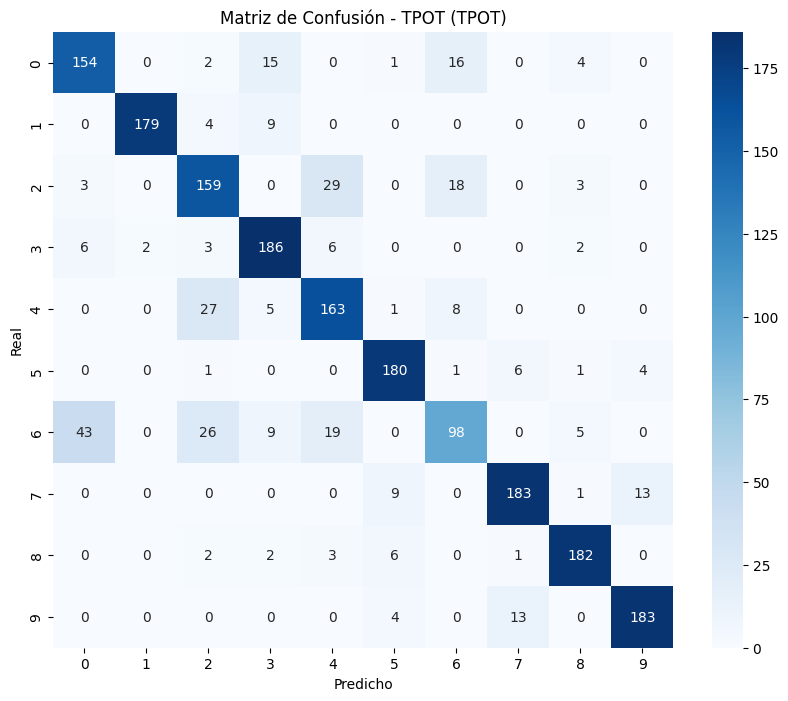


Peores clases por F1-score:
Clase 6: F1 = 0.575


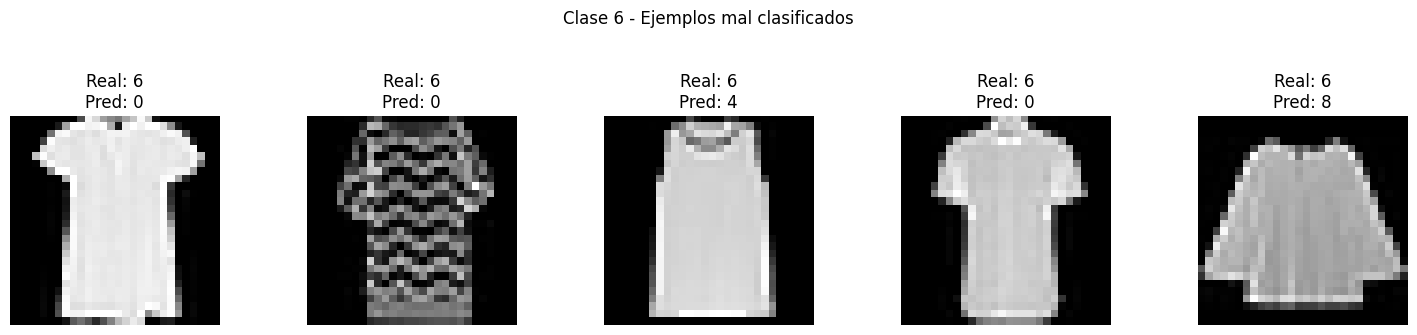

Clase 2: F1 = 0.729


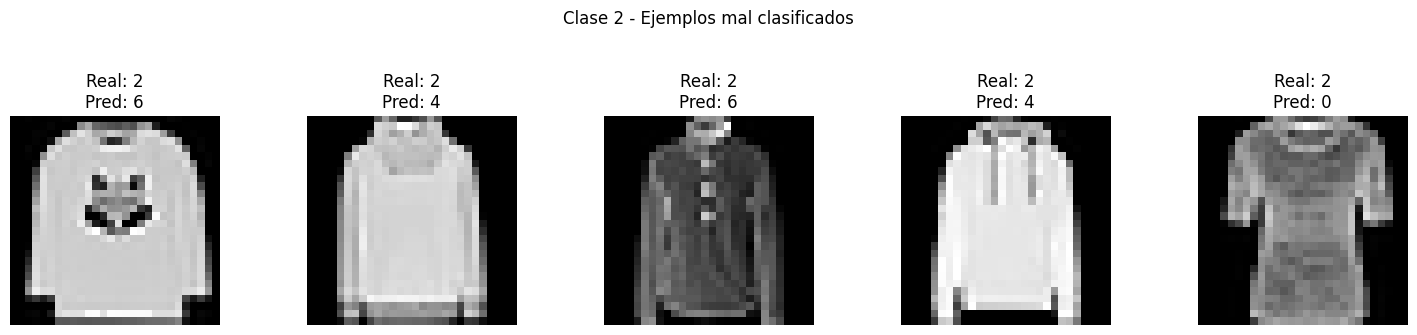

Clase 4: F1 = 0.769


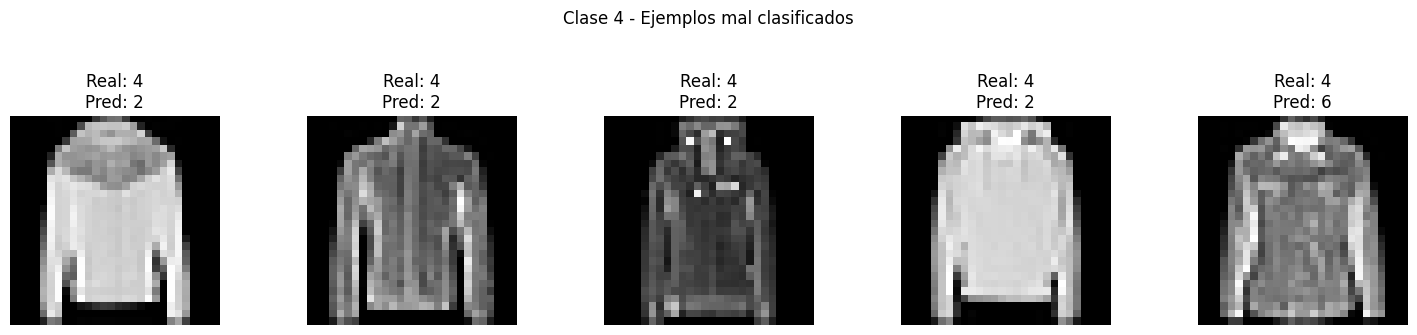

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time  # ¡Importación faltante!
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
from skopt import BayesSearchCV
from tpot import TPOTClassifier
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

def nb_models_full_analysis(csv_file, n_images=5):
    # Carga y preprocesamiento
    df = pd.read_csv(csv_file)
    labels = df.iloc[:, 0].values
    features = df.iloc[:, 1:].values
    original_images = df.iloc[:, 1:].values.reshape(-1, 28, 28)  # Asumiendo MNIST 28x28
    
    # Preprocesamiento
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)
    pca = PCA(n_components=0.95)
    features_pca = pca.fit_transform(features_scaled)
    features_pca_pos = MinMaxScaler(feature_range=(0, 1)).fit_transform(features_pca)
    
    # Split de datos conservando índices para imágenes
    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
        features_pca_pos, labels, range(len(labels)), test_size=0.2, random_state=42
    )

    # Modelos base
    base_models = {
        "GNB": GaussianNB(),
        "MNB": MultinomialNB(),
        "BNB": BernoulliNB(binarize=0.5)
    }

    # Parámetros para búsqueda
    param_grids = {
        "GNB": {"var_smoothing": [1e-9, 1e-8, 1e-7]},
        "MNB": {"alpha": [0.1, 0.5, 1.0], "fit_prior": [True, False]},
        "BNB": {"alpha": [0.1, 0.5, 1.0], "binarize": [0.3, 0.5, 0.7]}
    }

    # Almacenamiento de resultados
    results_table = {
        "Sin optimizar": {"GNB": None, "MNB": None, "BNB": None, "avg (σ)": None},
        "Grid search": {"GNB": None, "MNB": None, "BNB": None, "avg (σ)": None},
        "Random search": {"GNB": None, "MNB": None, "BNB": None, "avg (σ)": None},
        "Bayes optimization": {"GNB": None, "MNB": None, "BNB": None, "avg (σ)": None},
        "TPOT": {"GNB": None, "MNB": None, "BNB": None, "avg (σ)": None}
    }

    # 1. Evaluación sin optimizar
    print("\n=== Evaluación sin optimización ===")
    for name, model in base_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        results_table["Sin optimizar"][name] = f1
        print(f"{name}: F1 = {f1:.4f}")

    # 2. Optimización con diferentes métodos
    optimization_methods = {
        "Grid search": lambda est, params: GridSearchCV(est, params, cv=3, scoring='f1_weighted'),
        "Random search": lambda est, params: RandomizedSearchCV(est, params, n_iter=10, cv=3, scoring='f1_weighted'),
        "Bayes optimization": lambda est, params: BayesSearchCV(est, params, n_iter=10, cv=3, scoring='f1_weighted')
    }

    for method_name, method in optimization_methods.items():
        print(f"\n=== {method_name} ===")
        method_results = []
        
        for name, model in base_models.items():
            start_time = time.time()
            opt_model = method(model, param_grids[name])
            opt_model.fit(X_train, y_train)
            y_pred = opt_model.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='weighted')
            results_table[method_name][name] = f1
            method_results.append(f1)
            print(f"{name}: F1 = {f1:.4f} | Tiempo: {time.time()-start_time:.2f}s | Mejores params: {opt_model.best_params_}")
            
        # Calcular promedio y desviación estándar
        avg_f1 = np.mean(method_results)
        std_f1 = np.std(method_results)
        results_table[method_name]["avg (σ)"] = f"{avg_f1:.4f} (±{std_f1:.4f})"

    # 3. TPOT (solo una ejecución)
    print("\n=== TPOT ===")
    tpot = TPOTClassifier(generations=3, population_size=10, cv=3, 
                         scoring='f1_weighted', verbosity=2, random_state=42)
    start_time = time.time()
    tpot.fit(X_train, y_train)
    tpot_time = time.time() - start_time
    tpot_f1 = f1_score(y_test, tpot.predict(X_test), average='weighted')
    results_table["TPOT"]["avg (σ)"] = f"{tpot_f1:.4f}"
    print(f"TPOT F1: {tpot_f1:.4f} | Tiempo: {tpot_time:.2f}s")

    # Mostrar tabla de resultados
    print("\n\n=== Tabla de Resultados ===")
    df_results = pd.DataFrame(results_table).T
    print(tabulate(df_results, headers='keys', tablefmt='grid', floatfmt=".4f"))

    # Análisis del mejor modelo
    best_method = max(results_table.keys(), 
                     key=lambda x: float(results_table[x]["avg (σ)"].split()[0]) 
                     if results_table[x]["avg (σ)"] else 0)
    
    if best_method != "TPOT":
        best_model_name = max(base_models.keys(), 
                             key=lambda x: results_table[best_method][x])
        print(f"\nMejor método: {best_method}")
        print(f"Mejor modelo: {best_model_name}")
        
        # Configurar modelo óptimo para análisis
        opt_model = optimization_methods[best_method](base_models[best_model_name], 
                                                   param_grids[best_model_name])
        opt_model.fit(X_train, y_train)
        best_preds = opt_model.predict(X_test)
    else:
        best_model_name = "TPOT"
        best_preds = tpot.predict(X_test)

    # Matriz de confusión
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, best_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(labels), yticklabels=np.unique(labels))
    plt.title(f"Matriz de Confusión - {best_method} ({best_model_name})")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

    # Análisis de errores
    class_report = classification_report(y_test, best_preds, output_dict=True)
    worst_classes = sorted([(int(k), v['f1-score']) 
                          for k, v in class_report.items() if k.isdigit()], 
                          key=lambda x: x[1])[:3]
    
    print("\nPeores clases por F1-score:")
    for class_id, f1 in worst_classes:
        print(f"Clase {class_id}: F1 = {f1:.3f}")
        
        incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_test, best_preds)) 
                           if true == class_id and pred != class_id][:n_images]
        
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Clase {class_id} - Ejemplos mal clasificados", y=1.1)
        for i, idx in enumerate(incorrect_indices):
            plt.subplot(1, n_images, i+1)
            plt.imshow(original_images[idx_test[idx]], cmap='gray')
            plt.title(f"Real: {y_test[idx]}\nPred: {best_preds[idx]}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    return df_results

# Ejecución
final_results = nb_models_full_analysis("/Users/emece/patterns/laboratorio6/mnist_test.csv")

RESULTADOS DE MODELOS NB SIN OPTIMIZAR

In [34]:
resultados

,GaussianNB: 0.7420801907695795
0,MultinomialNB: 0.7896584384385469
1,BernoulliNB: 0.7146997642117346


CONCLUSIONES:

La optimización de hiperparámetros mediante técnicas como Grid Search, Random Search, y Bayesian Optimization demostró mejorar significativamente el rendimiento de los algoritmos Naive Bayes (GaussianNB, MultinomialNB y BernoulliNB), incrementando sus puntajes F1 en comparación con su configuración por defecto. Sin embargo viendo la tabla de resultados me da a entender que TPOT no es ideal para optimizar modelos Naive Bayes en problemas de alta dimensionalidad, entonces en este caso, grid search resulto ser mas eficaz para este tipo de modelos especificos.